<a href="https://colab.research.google.com/github/mahan2210/Pytorch_scratch/blob/main/02_pytorch_classification_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from sklearn.datasets import make_circles

#Make 1000 Circles
n_samples= 1000

#Create Circles
X,y= make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f" First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}"  )

 First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                        "label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


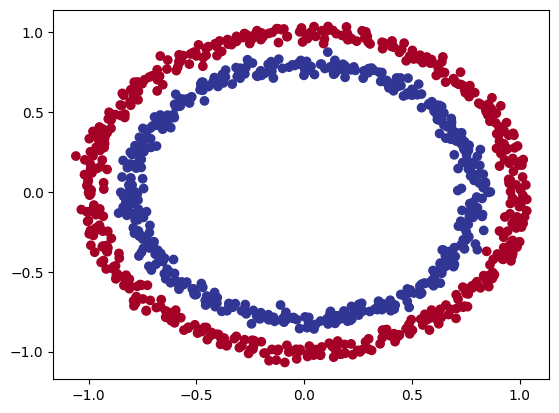

In [ ]:
# prompt: Visualize with circles

import matplotlib.pyplot as plt
# plt.scatter(x=circles["X0"],
#             y=circles["X1"],
#             c=circles["label"], cmap=plt.cm.RdYlBu);
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X_sample= X[0]
y_sample=y[0]

print(f" one Sample point of X: {X_sample} and y sample {y_sample}")
print(f"Shape of Sample point X: {X_sample.shape} and  shape of y sample {y_sample.shape}")

 one Sample point of X: [0.75424625 0.23148074] and y sample 1
Shape of Sample point X: (2,) and  shape of y sample ()


In [ ]:
#@title Turn data into tensor and perform splitting
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
type(X), X.dtype, type(y), y.dtype

(numpy.ndarray, dtype('float64'), numpy.ndarray, dtype('int64'))

In [ ]:
#Turn data into tensors
X= torch.from_numpy(X).type(torch.float) #Default type is float32
y= torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [ ]:
#Split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)
#

(800, 200, 800, 200)

# Building a model
Steps:
1. Setup device agnostic code so our code will run on an GPU
2. Construct a model (By subclassing nn.module)
3. Define a loss function and a optimizer
4. Create a training and test loop

In [ ]:
import torch
from torch import nn
#Device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

####Model Construction
1. Subclass nn.module
2. create 2 nn.Linear
3. Define forward()
4. Instantiate an instance of our model class and send it to the targer device

In [ ]:
#1
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2
    self.layer_1 = nn.Linear(in_features=2, out_features = 64) # input feature 2> x0, x1, 1st hidden layer 64 output
    self.layer_2= nn.Linear(in_features=64, out_features=1)# input= similar to prev hidden layer, output=y
  #or
    # self.two_linear_layer= nn.Sequential(
    #     nn.Linear(in_features=2, out_features=64),
    #     nn.Linear(in_features=64, out_features=1)
    # )
  #3
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
    #return self.two_linear_layer(x)
#4
model_0= CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Replicate using nn.sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3577,  0.3354],
                      [-0.4960,  0.3411],
                      [-0.5455, -0.2490],
                      [ 0.4495, -0.1960],
                      [-0.2034, -0.2846]], device='cuda:0')),
             ('0.bias',
              tensor([0.4356, 0.1225, 0.5025, 0.3038, 0.3789], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4253, -0.4340,  0.3952, -0.1039, -0.0089]], device='cuda:0')),
             ('1.bias', tensor([-0.2896], device='cuda:0'))])

In [ ]:
#Make some prediction
with torch.inference_mode():
  untrained_preds= model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: {untrained_preds[:10]}")
print(f"\nFirst 10 test labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: tensor([[-0.6544],
        [-0.7142],
        [-0.3242],
        [-0.7487],
        [-0.0490],
        [-0.0876],
        [-0.4742],
        [-0.3268],
        [-0.3363],
        [-0.7152]], device='cuda:0')

First 10 test labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
#Loss function and optimizer
loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

## Train model->
Steps:
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backwards(backpropagation)
5. Optimizer Step (gradient Descent)

In [ ]:
#View the first 5 raw outputs without being passed through activation function (logits)of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits= model_0(X_test.to(device))
y_logits[:5]

tensor([[-0.6544],
        [-0.7142],
        [-0.3242],
        [-0.7487],
        [-0.0490]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.3420],
        [0.3287],
        [0.4196],
        [0.3211],
        [0.4878]], device='cuda:0')

use round to create probabilities value

In [ ]:
#Find the predicted labels
# torch.round(y_pred_probs[:5])
y_preds= torch.round(y_pred_probs[:5])
y_preds[:5]

#In full (logits-> pred probs -> pred labels)
y_preds_labels= torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_preds_labels[:5]

#check for equality
print(torch.eq(y_preds_labels.squeeze(), y_preds.squeeze()))

y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
!nvidia-smi

Mon Jun 23 12:04:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P0             28W /   70W |     150MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#@title Building a training and testing loop
torch.cuda.manual_seed(42)
#Set the number of epochs
epochs=100

#put the data to target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range(epochs):
  ###Training
  model_0.train()

  #1.Forward pass
  y_logits= model_0(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))

  #2.Calculate loss/ acc
  loss= loss_fn(y_logits, y_train)#nn.BCEwithLogitsLoss expects raw logits as input
  acc= accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4.loss backward (backpropagation)
  loss.backward()

  #5.optimizer step (Gradient Descent)
  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
    #1.Forward pass
    test_logits= model_0(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    #2.Calculate loss/ acc
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)

  #Print
  if epoch % 10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f},Test acc:{test_acc:.2f}%")


Epoch: 0 | Loss: 0.71809 | Acc: 45.38% | Test Loss: 0.71009,Test acc:45.50%
Epoch: 10 | Loss: 0.70612 | Acc: 45.75% | Test Loss: 0.69856,Test acc:49.50%
Epoch: 20 | Loss: 0.70155 | Acc: 47.25% | Test Loss: 0.69425,Test acc:50.00%
Epoch: 30 | Loss: 0.69947 | Acc: 47.62% | Test Loss: 0.69248,Test acc:52.00%
Epoch: 40 | Loss: 0.69829 | Acc: 48.62% | Test Loss: 0.69169,Test acc:50.00%
Epoch: 50 | Loss: 0.69749 | Acc: 48.50% | Test Loss: 0.69131,Test acc:52.50%
Epoch: 60 | Loss: 0.69688 | Acc: 48.50% | Test Loss: 0.69111,Test acc:52.50%
Epoch: 70 | Loss: 0.69639 | Acc: 48.75% | Test Loss: 0.69102,Test acc:52.50%
Epoch: 80 | Loss: 0.69598 | Acc: 48.88% | Test Loss: 0.69100,Test acc:52.50%
Epoch: 90 | Loss: 0.69563 | Acc: 48.62% | Test Loss: 0.69101,Test acc:53.50%


In [85]:
import requests
from pathlib import Path

#Download helper function from Learn Pytorch Repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

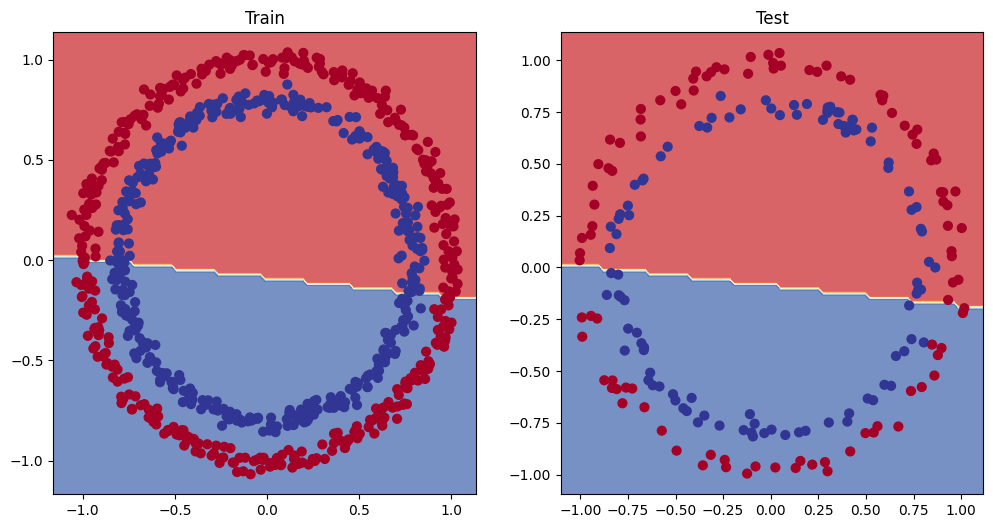

In [ ]:
#Plot decision Boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

#Improving  model (from model's perspective)
1. Add layers
2. More hidden Units
3. Fit for longer (epoch)
4. Changing Activation functions
5. Change learning rate
6. Change loss function

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3587,  0.2372],
                      [-0.4978,  0.2280],
                      [-0.5420, -0.1165],
                      [ 0.4487, -0.2256],
                      [-0.2036, -0.2846]])),
             ('0.bias', tensor([0.3697, 0.0500, 0.5805, 0.2863, 0.3796])),
             ('1.weight',
              tensor([[-0.2691, -0.3364,  0.4339, -0.1105, -0.0272]])),
             ('1.bias', tensor([-0.1075]))])

In [ ]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]], device='cuda:0')

In [ ]:
y_train[:5]

tensor([1., 0., 0., 0., 1.], device='cuda:0')

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2, out_features=10)
    self.layer_2= nn.Linear(in_features=10, out_features=10)
    self.layer_3= nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)
    # return z #or
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1= CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

# Next Steps:
1. Create loss function
2. Create an optimizer
3. Write Training and evaluation loop


In [ ]:
#Loss function
loss_fn= nn.BCEWithLogitsLoss()


#Optimizer
optimizer= torch.optim.Adam(params=model_1.parameters(),
                           lr=0.001)

In [ ]:
#Training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

#put the data to target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range(epochs):
  ###Training
  model_1.train()

  #1.Forward pass
  y_logits= model_1(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits)) #Logits> prediction probability > Prediction Label

  #2.Calculate loss/ acc
  loss= loss_fn(y_logits, y_train)#nn.BCEwithLogitsLoss expects raw logits as input
  acc= accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4.loss backward (backpropagation)
  loss.backward()

  #5.optimizer step (Gradient Descent)
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    #1.Forward pass
    test_logits= model_1(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    #2.Calculate loss/ acc
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)

  #Print
  if epoch % 10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f},Test acc:{test_acc:.2f}%")



Epoch: 0 | Loss: 0.69436 | Acc: 50.00% | Test Loss: 0.69550,Test acc:50.00%
Epoch: 10 | Loss: 0.69304 | Acc: 50.50% | Test Loss: 0.69486,Test acc:47.00%
Epoch: 20 | Loss: 0.69304 | Acc: 53.37% | Test Loss: 0.69461,Test acc:48.00%
Epoch: 30 | Loss: 0.69301 | Acc: 50.75% | Test Loss: 0.69448,Test acc:46.00%
Epoch: 40 | Loss: 0.69298 | Acc: 50.88% | Test Loss: 0.69473,Test acc:46.00%
Epoch: 50 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69479,Test acc:47.00%
Epoch: 60 | Loss: 0.69298 | Acc: 50.75% | Test Loss: 0.69466,Test acc:45.50%
Epoch: 70 | Loss: 0.69298 | Acc: 51.50% | Test Loss: 0.69466,Test acc:45.50%
Epoch: 80 | Loss: 0.69298 | Acc: 51.38% | Test Loss: 0.69468,Test acc:45.00%
Epoch: 90 | Loss: 0.69298 | Acc: 51.38% | Test Loss: 0.69468,Test acc:45.00%
Epoch: 100 | Loss: 0.69298 | Acc: 51.25% | Test Loss: 0.69468,Test acc:45.50%
Epoch: 110 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69468,Test acc:46.00%
Epoch: 120 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468,Test acc:45.5

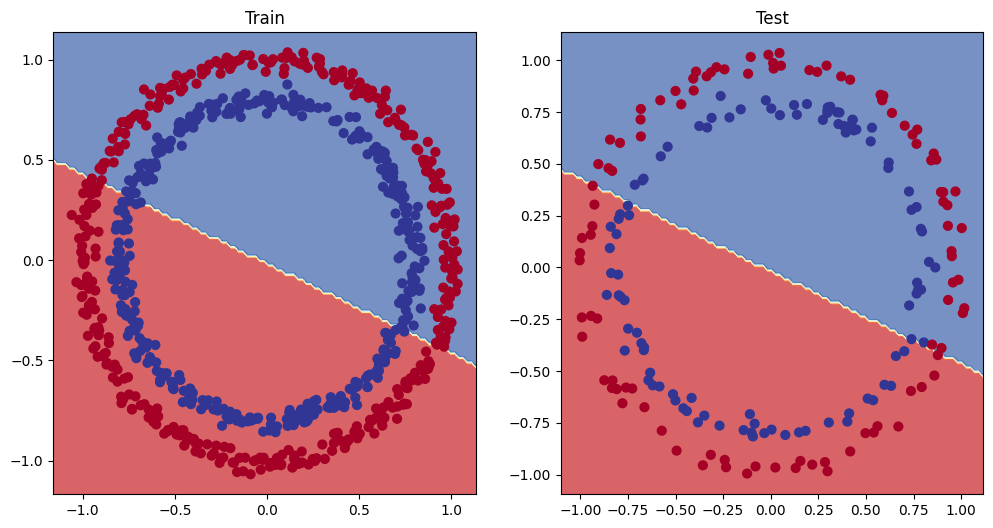

In [ ]:
#Plot decision Boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

# Recreating non linear data

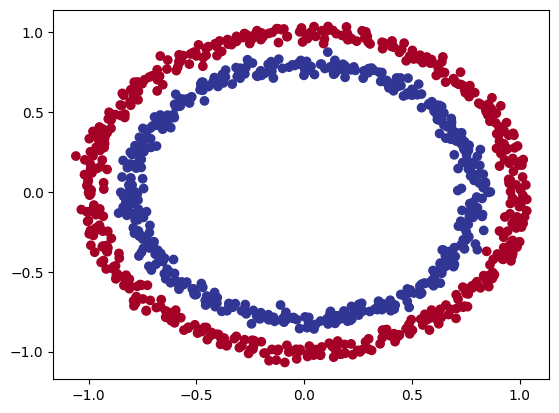

In [ ]:
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

#Make 1000 Circles
n_samples= 1000

#Create Circles
X,y= make_circles(n_samples, noise=0.03, random_state=42)

# plt.scatter(x=circles["X0"],
#             y=circles["X1"],
#             c=circles["label"], cmap=plt.cm.RdYlBu);
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
#Split data into training and test set
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X= torch.from_numpy(X).type(torch.float) #Default type is float32
y= torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)
X_train[:5],y_train[:5]
#

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
#Building a model of non linear activation function
from torch import nn
class CircleModeV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2, out_features=10)
    self.layer_2= nn.Linear(in_features=10, out_features=10)
    self.layer_3= nn.Linear(in_features=10, out_features=1)
    self.relu= nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

#Device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

model_3= CircleModeV2().to(device)
model_3

CircleModeV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(params=model_3.parameters(),
                           lr=0.001)


In [ ]:
#Train model with non -linearity
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

epochs=1000

for epoch in range(epochs):
  ###Training
  model_3.train()

  #Forward passing
  y_logits= model_3(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))


  #Calculate the loss

  loss= loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true=y_train, y_pred=y_pred) #style of scikit learn

  #Optimizer Zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  optimizer.step()

  ###Testing
  model_3.eval()
  with torch.inference_mode():
    #1.Forward pass
    test_logits= model_3(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    #2.Calculate loss/ acc

    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)

  #Print
  if epoch % 100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f},Test acc:{test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929 | Acc: 50.00% | Test Loss: 0.6931,Test acc:50.00%
Epoch: 100 | Loss: 0.6848 | Acc: 52.88% | Test Loss: 0.6829,Test acc:57.00%
Epoch: 200 | Loss: 0.6629 | Acc: 64.50% | Test Loss: 0.6598,Test acc:65.00%
Epoch: 300 | Loss: 0.6067 | Acc: 78.38% | Test Loss: 0.6070,Test acc:76.50%
Epoch: 400 | Loss: 0.5002 | Acc: 95.12% | Test Loss: 0.5136,Test acc:94.00%
Epoch: 500 | Loss: 0.3804 | Acc: 98.88% | Test Loss: 0.4055,Test acc:98.50%
Epoch: 600 | Loss: 0.2641 | Acc: 99.75% | Test Loss: 0.2923,Test acc:99.50%
Epoch: 700 | Loss: 0.1856 | Acc: 99.62% | Test Loss: 0.2173,Test acc:99.50%
Epoch: 800 | Loss: 0.1357 | Acc: 99.75% | Test Loss: 0.1658,Test acc:99.00%
Epoch: 900 | Loss: 0.1023 | Acc: 99.88% | Test Loss: 0.1312,Test acc:99.50%


In [ ]:
print(test_logits.shape, y_test.shape)

torch.Size([200]) torch.Size([200])


In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1503,  1.8660],
                      [-1.1201,  1.8928],
                      [-0.1549,  0.1427],
                      [-1.6830, -0.5614],
                      [ 0.1365, -1.7340],
                      [ 1.6886,  0.6859],
                      [ 1.3324, -1.4519],
                      [ 0.3410, -0.0998],
                      [ 1.8232,  0.6748],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.9949, -1.1605, -0.2872, -0.4139, -0.8738, -1.3032, -1.0461, -0.4252,
                      -0.6827, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.7371, -1.1149,  0.2441, -1.2107, -1.1728, -0.8349, -1.0349,  0.2555,
                       -0.8702, -0.0997],
                      [ 1.1107,  1.0225,  0.1331,  1.5596,  1.2427,  0.8036,  1.2559,  0.0566,
                        1.1511, -0.1927],
                      [-0.3225, -0.141

In [ ]:
# prompt: check the device

device

'cuda'

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds= torch.round(torch.sigmoid(model_3(X_test.to(device)))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

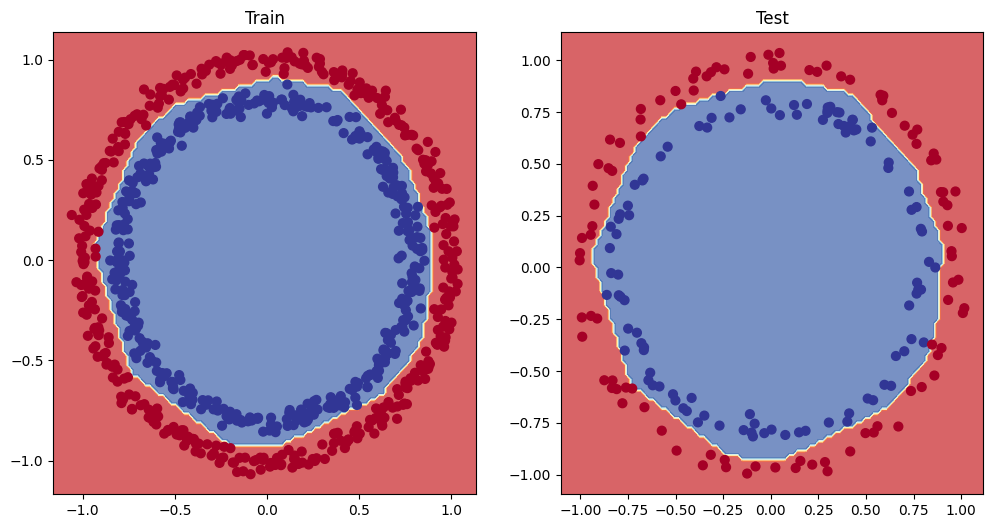

In [ ]:
#Plot decision Boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

# Replication of RELU and Sigmoid


In [ ]:
#Create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype


torch.float32

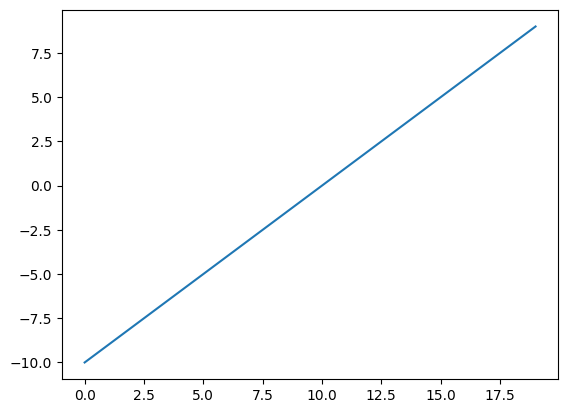

In [ ]:
plt.plot(A)

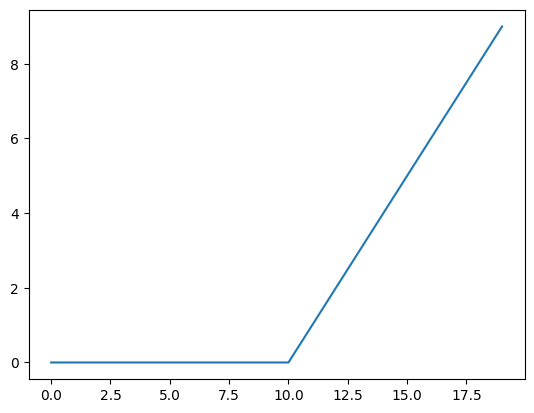

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:

  return torch.maximum(torch.tensor(0),x)

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

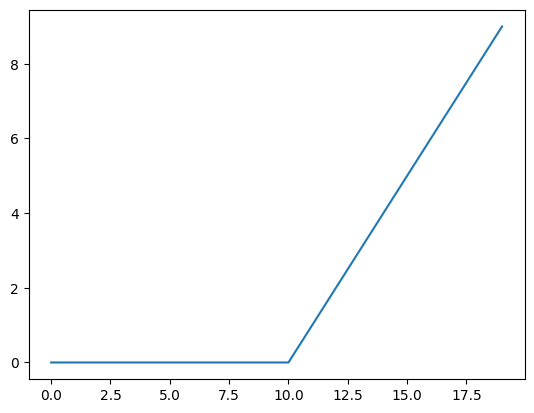

In [ ]:
plt.plot(relu(A))

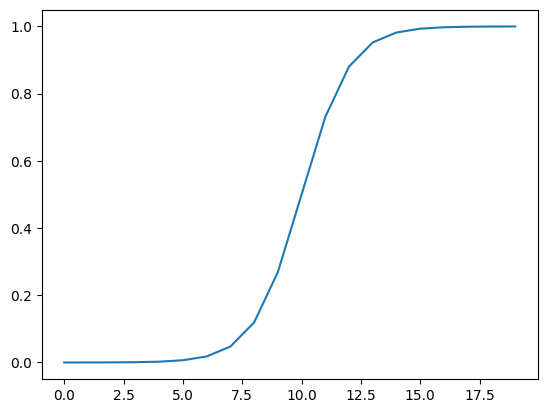

In [ ]:
def sigmoid(x:torch.Tensor) -> torch.Tensor:
  return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))

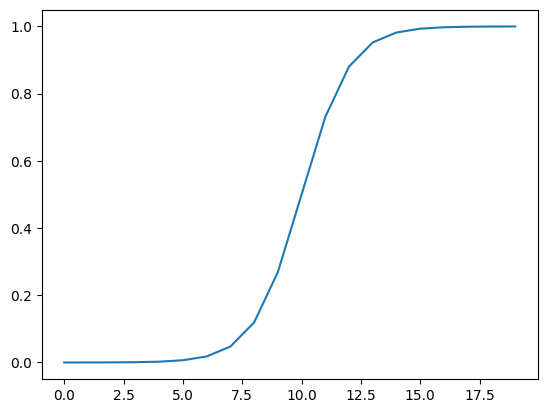

In [ ]:
plt.plot(torch.sigmoid(A))

# Multiclass Classification



Data Creation

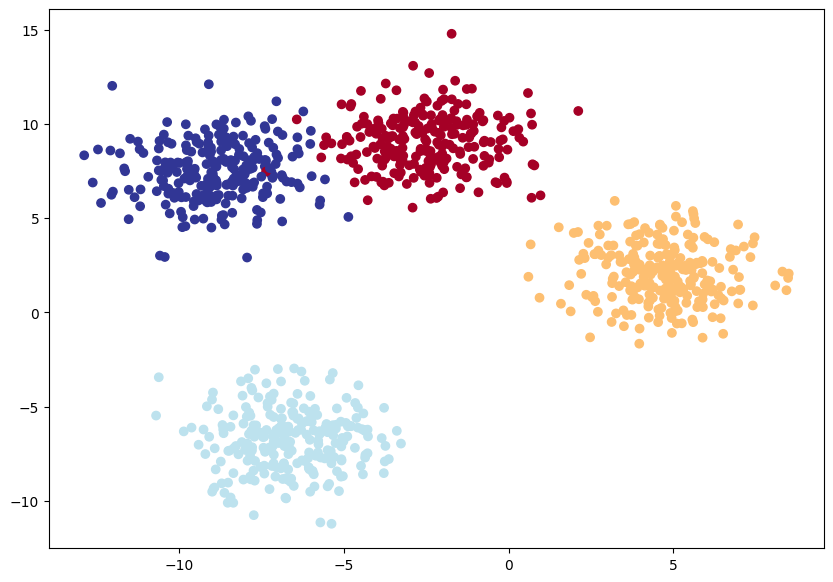

In [59]:
#import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASSES= 4
NUM_FEATURES= 2
RANDOM_SEED= 42

#Create multiclass the data
X_blob, y_blob= make_blobs(n_samples= 1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)

#Turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob= torch.from_numpy(y_blob).type(torch.LongTensor)

#Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test= train_test_split(X_blob,
                                                   y_blob,
                                                   test_size=0.2,
                                                   random_state=RANDOM_SEED)
#Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

Building Model

In [60]:
#Create Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [61]:
#Build a multiclass classification model
from torch import nn
class BlobModel(nn.Module):
  def __init__(self,input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

#Create an instance of the class and send it to the target device
model_4= BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [62]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [63]:
X_blob_train[:5], y_blob_train[:5]

(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175]]),
 tensor([1, 0, 2, 2, 0]))

In [64]:
torch.unique(y_blob_train)#return only the distinct values present in the input tensor, in this case it will return 4 distinct classes

tensor([0, 1, 2, 3])

Create loss function and optimizer for multiclass classification


In [65]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_4.parameters(),
                           lr=0.1)

In [66]:
#to check model's device
next(model_4.parameters()).device

device(type='cuda', index=0)

In [67]:
#Check data's device
X_blob_test.device

device(type='cpu')

# Working with Raw Model

We need to convernt model's output (logits) to prediction probabilities> prediction labels.

Logits (raw output of the model)> Pred Probs(use `torch.softmax`) >Pred labels(take argmax of the prediction probabilities)

In [68]:
model_4.eval()
with torch.inference_mode():
  y_logits =  model_4(X_blob_test.to(device))

y_logits[:5]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')

In [69]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

We are getting 4 float value  , but to match with the output format we need to prediction probabilities and then to prediction labels

**Now we are going to use softmax to get the probability prediction. In softmax , the sum of all probability will be one. we can get max probability value using max() and we can get the index of max value using argmax()**

In [70]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [71]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [72]:
torch.max(y_pred_probs[0])

tensor(0.3715, device='cuda:0')

In [73]:
torch.argmax(y_pred_probs[0])

tensor(3, device='cuda:0')

In [74]:
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds


tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [75]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

Creating a training loop and testing loop for a multiclass Pytorch model

In [76]:
#@title Building a training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#Set the number of epochs
epochs=100

def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

#put the data to target device
X_blob_train, y_blob_train= X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test= X_blob_test.to(device), y_blob_test.to(device)

#Building training and evaluation loop
for epoch in range(epochs):
  ###Training
  model_4.train()

  #1.Forward pass
  y_logits= model_4(X_blob_train)
  y_pred= torch.softmax(y_logits, dim=1).argmax(dim=1)
  #y_pred= torch.argmax(y_pred, dim=1)

  #2.Calculate loss/ acc
  loss= loss_fn(y_logits, y_blob_train)
  acc= accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4.loss backward (backpropagation)
  loss.backward()

  #5.optimizer step (Gradient Descent)
  optimizer.step()

  ###Testing
  model_4.eval()
  with torch.inference_mode():
    #1.Forward pass
    test_logits= model_4(X_blob_test)
    test_pred= torch.softmax(test_logits, dim=1).argmax(dim=1)

    #2.Calculate loss/ acc
    test_loss= loss_fn(test_logits, y_blob_test)
    test_acc= accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  #Print
  if epoch % 10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f},Test acc:{test_acc:.2f}%")


Epoch: 0 | Loss: 1.0432 | Acc: 65.50% | Test Loss: 0.5786,Test acc:95.50%
Epoch: 10 | Loss: 0.1440 | Acc: 99.12% | Test Loss: 0.1304,Test acc:99.00%
Epoch: 20 | Loss: 0.0806 | Acc: 99.12% | Test Loss: 0.0722,Test acc:99.50%
Epoch: 30 | Loss: 0.0592 | Acc: 99.12% | Test Loss: 0.0513,Test acc:99.50%
Epoch: 40 | Loss: 0.0489 | Acc: 99.00% | Test Loss: 0.0410,Test acc:99.50%
Epoch: 50 | Loss: 0.0429 | Acc: 99.00% | Test Loss: 0.0349,Test acc:99.50%
Epoch: 60 | Loss: 0.0391 | Acc: 99.00% | Test Loss: 0.0308,Test acc:99.50%
Epoch: 70 | Loss: 0.0364 | Acc: 99.00% | Test Loss: 0.0280,Test acc:99.50%
Epoch: 80 | Loss: 0.0345 | Acc: 99.00% | Test Loss: 0.0259,Test acc:99.50%
Epoch: 90 | Loss: 0.0330 | Acc: 99.12% | Test Loss: 0.0242,Test acc:99.50%


Making and evaluating predictions with a pytorch multiclass model

In [81]:
model_4.eval()
with torch.inference_mode():
  y_logits =  model_4(X_blob_test)

 #View first 10 logits
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [82]:
#Logits to prediction prob
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0')

In [83]:
# Pred prob to pred label
#y_pred_probs.argmax()
Y_preds= torch.argmax(y_pred_probs, dim=1)
Y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [84]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

MATCHED!

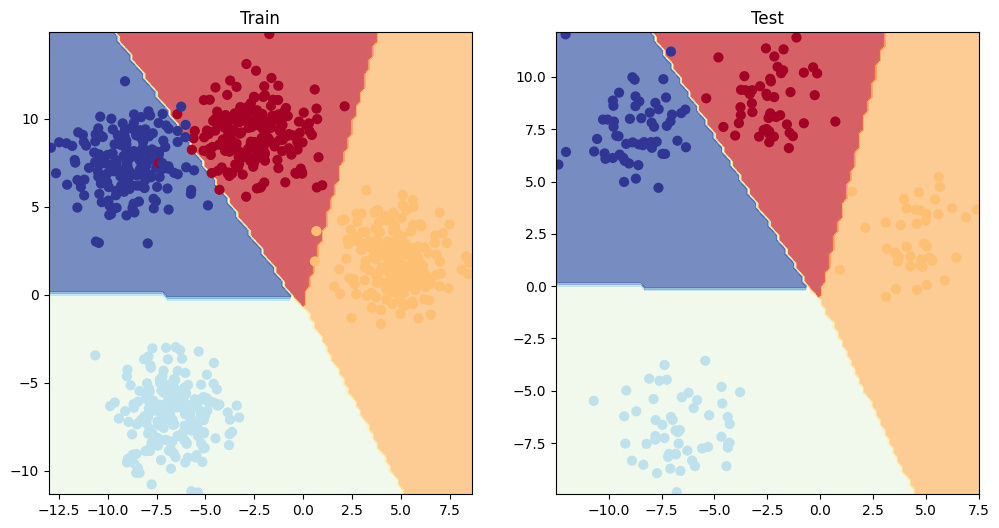

In [86]:
#Plot decision Boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

Classification Metrics


*   Accuracy
*   Precision
*   Recall
*   F1-Score
*   Confusion Matrix
*   Classification Report





In [87]:
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [88]:
from torchmetrics import Accuracy

#Setup metric
torchmetrics_acc= Accuracy(task="multiclass", num_classes=4).to(device)

#Calculate accuracy
torchmetrics_acc(Y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')